

### Q1. Key features of the wine quality data set and their importance in predicting wine quality:

The wine quality data set typically includes various chemical and physical properties of wines along with a quality rating. Key features often include:

- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol

**Importance:**
- **Fixed acidity, Volatile acidity, Citric acid:** These influence the taste and acidity levels of the wine.
- **Residual sugar:** Can affect sweetness perception.
- **Chlorides:** Impact on taste and perceived saltiness.
- **Sulfur dioxide levels:** Important for preservation and taste stability.
- **Density and pH:** Indicators of the chemical composition and potential fermentation characteristics.
- **Sulphates:** Contribute to antioxidant properties and stability.
- **Alcohol:** Directly impacts the perceived body and strength of the wine.

Understanding these features is crucial for predicting wine quality because they directly influence the sensory attributes and chemical composition that contribute to a wine's overall quality rating.

### Q2. Handling missing data in the wine quality data set:

Handling missing data is crucial to ensure the quality and reliability of analysis and modeling. Common techniques include:

- **Mean/Median/Mode Imputation:** Replace missing values with the mean, median, or mode of the feature. Advantages include simplicity and preservation of the original distribution. Disadvantages include potential distortion of relationships and underestimation of variance.
  
- **Forward Fill/Backward Fill:** Propagate the last known value forward or backward in time or across samples. Useful for time-series data. Advantageous for maintaining temporal relationships but may not be suitable for non-sequential data.
  
- **K-Nearest Neighbors (KNN) Imputation:** Estimate missing values based on similar known instances in the dataset. Advantageous for maintaining complex relationships but computationally intensive.

- **Multiple Imputation:** Generate several imputed datasets to account for uncertainty. Useful for complex datasets with high variability.

### Q3. Key factors affecting students' exam performance and statistical analysis:

Key factors influencing students' performance include:

- **Study habits:** Time spent studying, study techniques.
- **Socio-economic background:** Parental education, income level.
- **Motivation and interest:** Intrinsic and extrinsic motivation.
- **Health and well-being:** Physical and mental health.
- **Classroom environment:** Teaching quality, class size.

To analyze these factors statistically:

- **Regression Analysis:** Evaluate the relationship between independent variables (e.g., study time, socio-economic status) and the dependent variable (exam scores).
  
- **Factor Analysis:** Identify underlying factors (e.g., motivation, study habits) that contribute to exam performance.
  
- **ANOVA:** Assess differences in exam scores across categorical variables (e.g., socio-economic background, health status).
  
- **Correlation Analysis:** Explore relationships between variables (e.g., study time and exam scores) to identify potential predictors.

### Q4. Feature engineering process in the student performance data set:

Feature engineering involves:

- **Feature Selection:** Identifying relevant variables (e.g., study time, parental education) that influence exam performance.
  
- **Feature Transformation:** Converting variables if necessary (e.g., transforming categorical variables into numerical representations).
  
- **Feature Creation:** Generating new features based on domain knowledge or interaction terms (e.g., combining study time and motivation scores).

Selection and transformation involve using statistical techniques (e.g., correlation analysis, PCA) to retain informative variables and discard redundant or noisy ones.

### Q5. Exploratory Data Analysis (EDA) on the wine quality data set:

Performing EDA involves:

- **Descriptive Statistics:** Calculate mean, median, range, and variance for each feature.
  
- **Histograms and Density Plots:** Visualize distributions of each feature to identify non-normality.
  
- **Box Plots:** Detect outliers and understand the spread of data.
  
- **Correlation Matrix:** Evaluate relationships between features and with the target variable (wine quality).

Non-normal features may benefit from transformations like logarithmic or Box-Cox transformations to improve normality and stabilize variance.

### Q6. Principal Component Analysis (PCA) on the wine quality data set:

PCA is used to reduce the dimensionality of the data while preserving as much variance as possible. Steps include:

- **Standardization:** Scale the data to have zero mean and unit variance.
  
- **PCA Calculation:** Compute the eigenvectors and eigenvalues of the covariance matrix.
  
- **Variance Explained:** Plot cumulative explained variance to determine the number of principal components needed to capture a specified amount (e.g., 90%) of the total variance.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

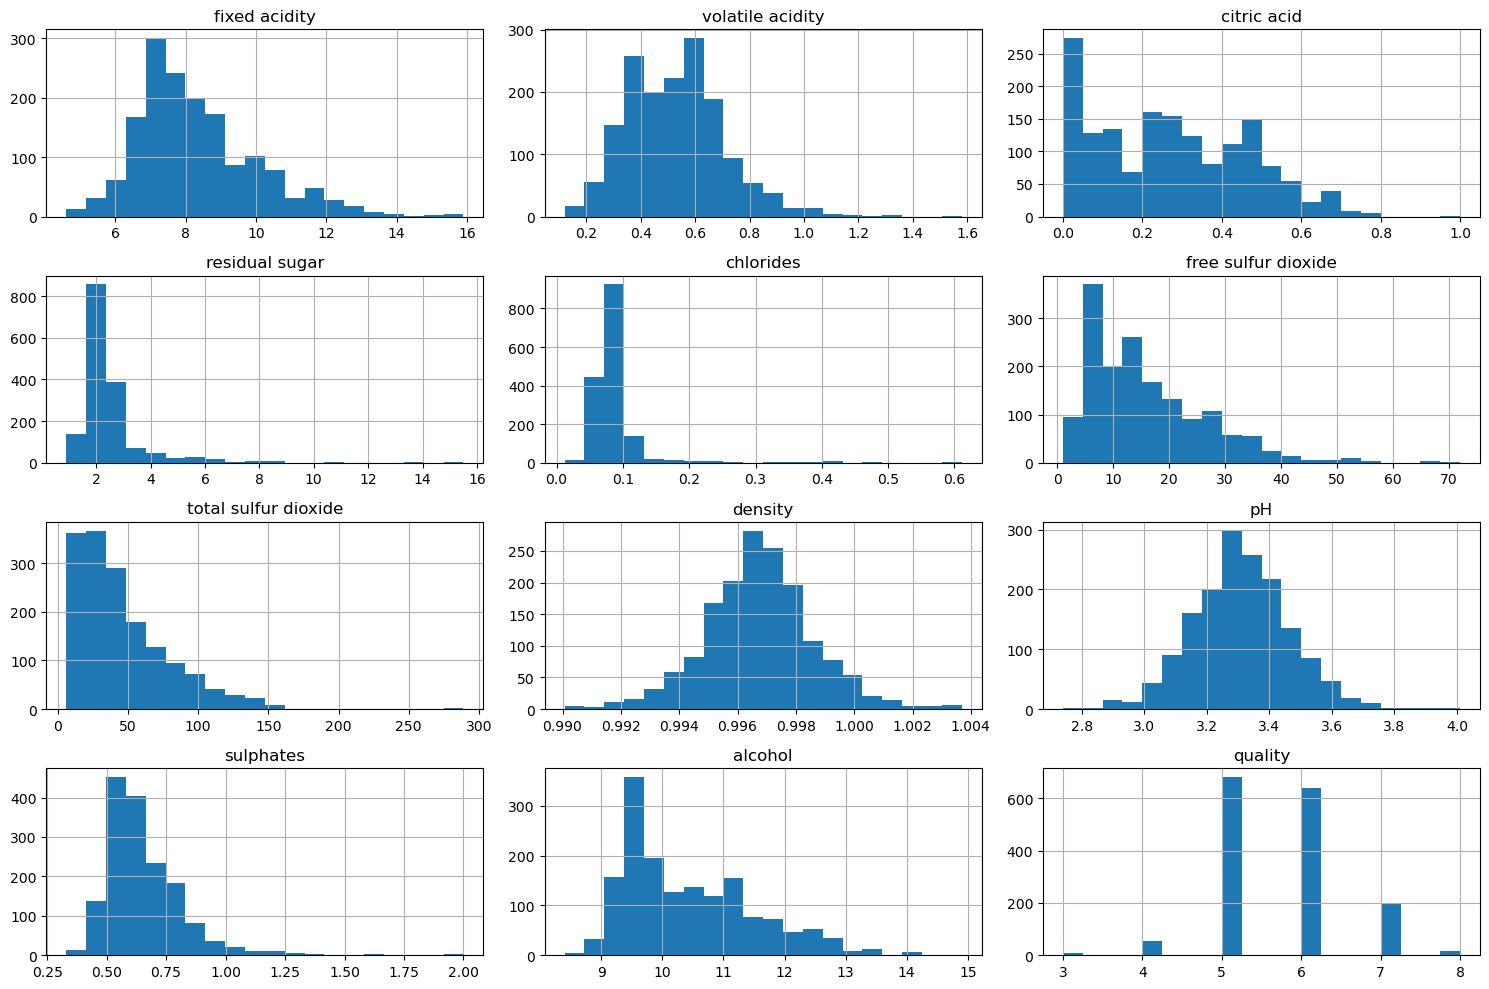

In [9]:
import pandas as pd

# Load the wine quality dataset with correct delimiter
wine_data = pd.read_csv('wine_quality.csv', delimiter=';')

# Display the first few rows and column names to verify
print(wine_data.head())
print(wine_data.columns)

# Example of exploring the data
# For example, calculating summary statistics
print(wine_data.describe())

# For further exploration, you can plot histograms
import matplotlib.pyplot as plt
wine_data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


Number of principal components explaining 90% variance: 7


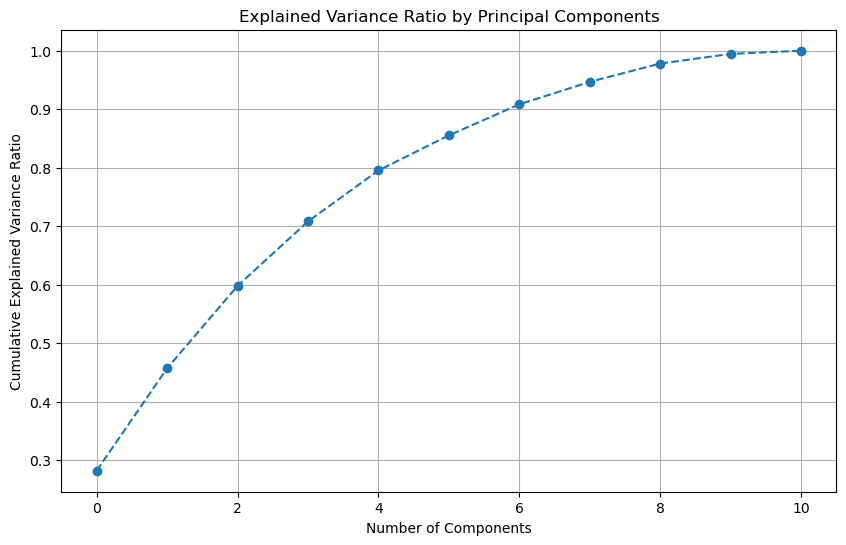

In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the wine quality dataset with correct delimiter
wine_data = pd.read_csv('wine_quality.csv', delimiter=';')

# Separate features (X) and target (y)
X = wine_data.drop(columns=['quality'])  # Exclude 'quality' column as it is the target
y = wine_data['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine number of components explaining 90% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print(f"Number of principal components explaining 90% variance: {n_components}")

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()
